In [103]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

train = pd.read_csv('./big-data-analytics-certification-kr-2022/train.csv')
test = pd.read_csv('./big-data-analytics-certification-kr-2022/test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4
1,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2
2,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2
3,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
4,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,3


In [2]:
train.info() # Null 값은 없네

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 572.9+ KB


In [74]:
train['Var_1'].value_counts()

5    4476
3     849
2     634
1     362
6     166
0     104
4      74
Name: Var_1, dtype: int64

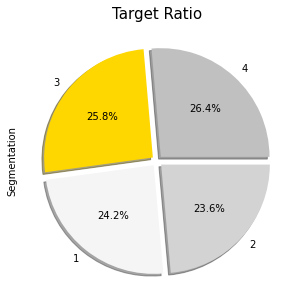

In [3]:
import matplotlib.pyplot as plt

explode = [0.05, 0.05, 0.05, 0.05]
colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

plt.subplots(figsize = (5,5))
train['Segmentation'].value_counts(normalize = True).plot(kind = 'pie', 
                                                          autopct = '%.1f%%',
                                                         colors = colors,
                                                         shadow = True,
                                                         explode = explode)

plt.title('Target Ratio', fontsize = 15)
plt.show()

- Target Ratio가 생각보다 균일하네

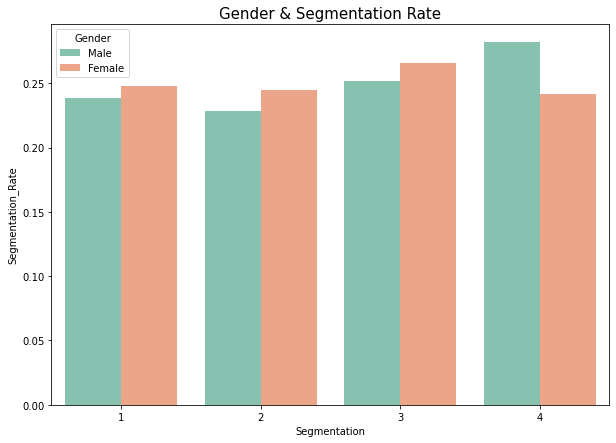

In [4]:
import seaborn as sns
sns.set_palette('Set2')

temp = train.groupby(['Gender'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'], 
            y = temp['Segmentation_Rate'], 
            hue = temp['Gender'],
            hue_order = ['Male','Female'],
            alpha = 0.85)

plt.title('Gender & Segmentation Rate', fontsize = 15)
plt.show()

- Segmentation의 4값을 보면 다른 값들과 다르게 남성비율이 높다.
- 아마도 Segmentation 4를 가르는 어느정도 괜찮은 변수가 되지않을까? 

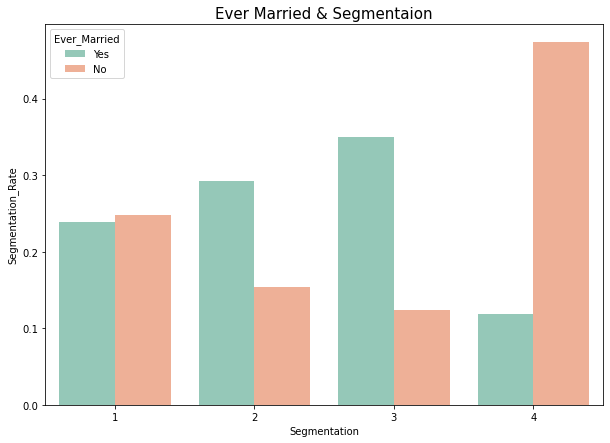

In [5]:
temp = train.groupby(['Ever_Married'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'
}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'], 
            y = temp['Segmentation_Rate'], 
            hue = temp['Ever_Married'],
            hue_order = ['Yes', 'No'],
            alpha = 0.75)

plt.title('Ever Married & Segmentaion', fontsize = 15)
plt.show()

- Ever Married 역시 유무에 따라 Segmentation이 갈리는데 Segmentation 4는 잘 분류하겠다.
- 근데 1같은 경우는 Ever Married로 분류하기에는 어려울 듯

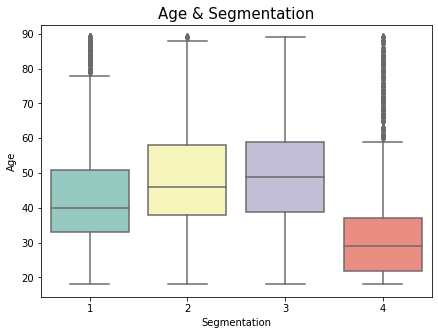

In [6]:
plt.subplots(figsize = (7,5))
sns.boxplot(x = train['Segmentation'], 
            y = train['Age'],
            palette = 'Set3')

plt.title('Age & Segmentation', fontsize = 15)
plt.show()

- 역시 Segmentation 4는 다른 클래스들의 비해 차이가 많이 난다.
- Age에서 각 클래스별로 어느정도 차이를 보이고 있다/

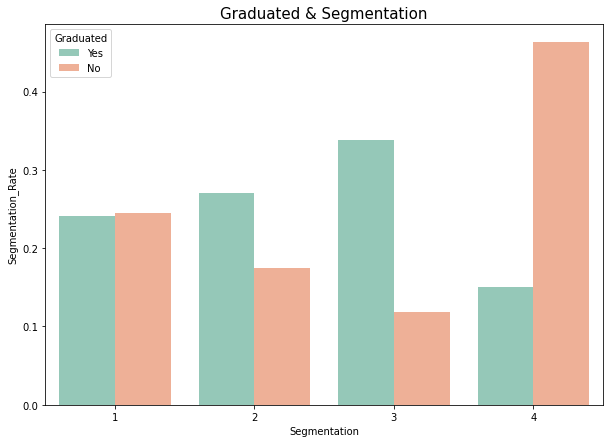

In [7]:
temp = train.groupby(['Graduated'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Rate'}).reset_index()

plt.subplots(figsize = (10,7))
sns.barplot(x = temp['Segmentation'],
            y = temp['Segmentation_Rate'],
            hue = temp['Graduated'],
            hue_order = ['Yes', 'No'],
            alpha = 0.75)

plt.title('Graduated & Segmentation', fontsize = 15)
plt.show()

In [8]:
train['Profession'].value_counts()

Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64

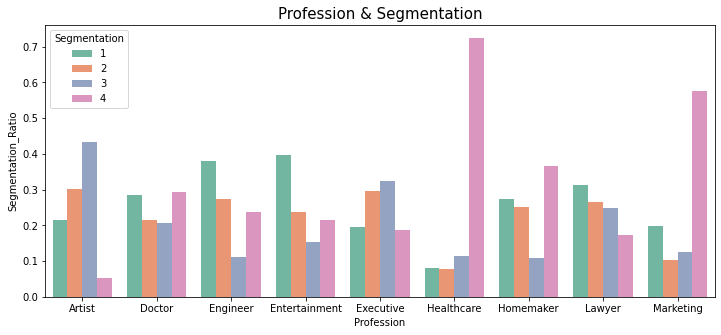

In [9]:
f, ax = plt.subplots(figsize = (12,5))
temp = train.groupby(['Profession'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Ratio'
}).reset_index() 

sns.barplot(x = temp['Profession'], 
            y = temp['Segmentation_Ratio'],
            hue = temp['Segmentation'])

plt.title('Profession & Segmentation', fontsize = 15)
plt.show()

- 뭔가 뚜렷하게 차이를 보이는 경우는 Healthcare, Marketing이네
- 그래도 profession별로 어느정도 차이가 보이기도 하네 

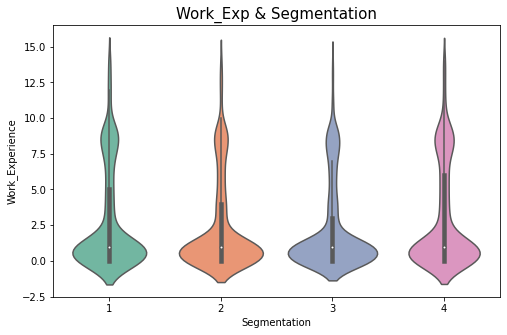

In [10]:
f, ax = plt.subplots(figsize = (8,5))
sns.violinplot(x = train['Segmentation'], 
                y = train['Work_Experience'])

plt.title('Work_Exp & Segmentation', fontsize = 15)
plt.show()

- Work_Exp랑 Segmentation이랑 크게 차이가 안나네

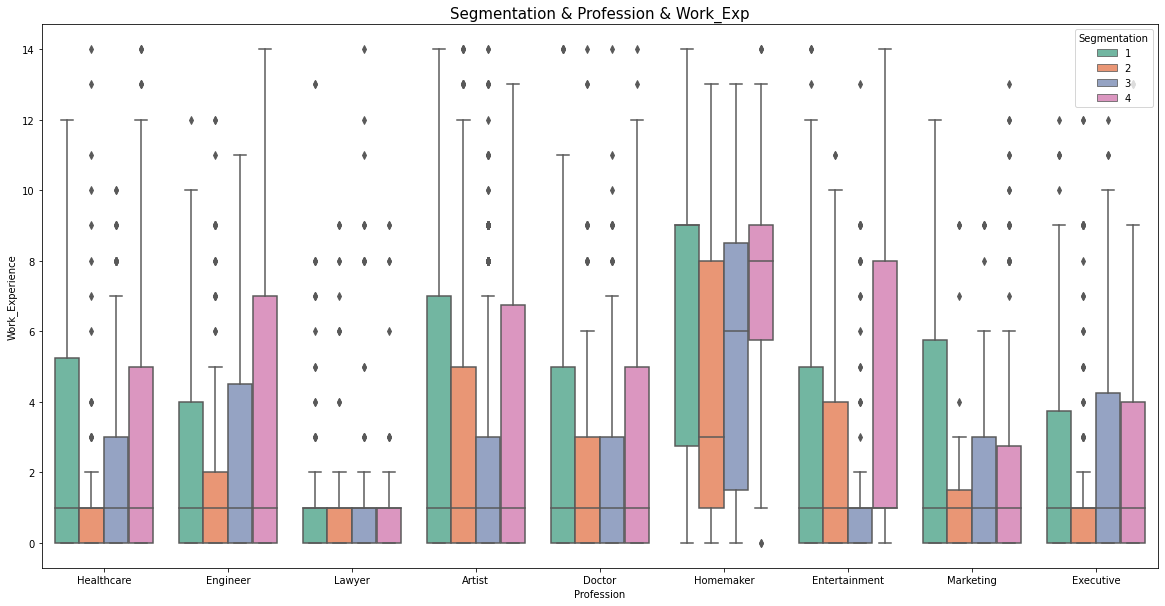

In [11]:
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(x = train['Profession'],
               y = train['Work_Experience'],
               hue = train['Segmentation'])
plt.title('Segmentation & Profession & Work_Exp', fontsize = 15)
plt.show()

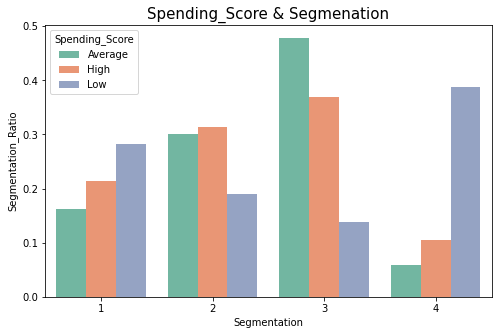

In [12]:
temp = train.groupby(['Spending_Score'])['Segmentation'].value_counts(normalize = True).to_frame().rename(columns = {
    'Segmentation' : 'Segmentation_Ratio'
}).reset_index()

plt.subplots(figsize = (8,5))
sns.barplot(x = temp['Segmentation'],
            y = temp['Segmentation_Ratio'],
            hue = temp['Spending_Score'])

plt.title('Spending_Score & Segmenation', fontsize = 15)
plt.show()

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer, StandardScaler

train = pd.read_csv('./big-data-analytics-certification-kr-2022/train.csv')
test = pd.read_csv('./big-data-analytics-certification-kr-2022/test.csv')
train.head()

def label_encoder(feature):
    le = LabelEncoder()
    le.fit(train[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])

label_encoder('Spending_Score')
label_encoder('Profession')
label_encoder('Ever_Married')
label_encoder('Gender')
label_encoder('Graduated')

# ss = StandardScaler()
# ss.fit(train[['Age']])
# train['Age'] = ss.transform(train[['Age']])
# test['Age'] = ss.transform(test[['Age']])

train['Age'] = train['Age']//10
test['Age'] = test['Age']//10

In [3]:
train = pd.get_dummies(train, columns = ['Profession','Var_1','Family_Size'])
test = pd.get_dummies(test, columns = ['Profession','Var_1','Family_Size'])

print(train.shape, test.shape)

(6665, 33) (2154, 32)


In [4]:
from sklearn.model_selection import train_test_split

y = train['Segmentation']
del train['Segmentation']
del train['ID']

X_train, X_val, Y_train, Y_val = train_test_split(train, y, test_size = 0.2, random_state = 12345, stratify = y)

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
# from xgboost import XGBClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth = 5)
rf.fit(X_train, Y_train)
gb = GradientBoostingClassifier(learning_rate = 0.05, n_estimators = 200, max_depth = 4)
gb.fit(X_train, Y_train)

hgb = HistGradientBoostingClassifier(learning_rate = 0.05, max_iter = 100)
hgb.fit(X_train, Y_train)
# xgb = XGBClassifier()
# xgb.fit(X_train, Y_train)

rf_pred = rf.predict(X_val)
hgb_pred = hgb.predict(X_val)
gb_pred = gb.predict(X_val)
# xgb_pred = xgb.predict(X_val)

print('acc_rf', accuracy_score(rf_pred, Y_val))
print('f1_rf', f1_score(rf_pred, Y_val, average = 'macro'))
print('acc_gb', accuracy_score(gb_pred, Y_val))
print('f1_gb', f1_score(gb_pred, Y_val, average = 'macro'))

print('acc_hgb', accuracy_score(hgb_pred, Y_val))
print('f1_hgb', f1_score(hgb_pred, Y_val, average = 'macro'))

# print('acc_xgb', accuracy_score(xgb_pred, Y_val))
# print('f1_xgb', f1_score(xgb_pred, Y_val, average = 'macro'))

print(cross_val_score(rf,X_train, Y_train, cv = 5, scoring = 'f1_macro').mean())
print(cross_val_score(gb,X_train, Y_train, cv = 5, scoring = 'f1_macro').mean())
print(cross_val_score(hgb,X_train, Y_train, cv = 5, scoring = 'f1_macro').mean())
# print(cross_val_score(xgb,X_train, Y_train, cv = 5, scoring = 'f1_macro').mean())

acc_rf 0.5206301575393848
f1_rf 0.48507069037224637
acc_gb 0.5236309077269318
f1_gb 0.5069660568220793
acc_hgb 0.5183795948987246
f1_hgb 0.5039550680426981
0.49996606130070004
0.5119315275479244
0.5054280405151671


In [42]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([('rf', rf), ('gb', gb), ('hgb', hgb)])
voting.fit(X_train, Y_train)

voting_pred = voting.predict(X_val)

print('acc_voting', accuracy_score(voting_pred, Y_val))
print('f1_voting', f1_score(voting_pred, Y_val, average = 'macro'))
print(cross_val_score(voting,X_train, Y_train, cv = 5, scoring = 'f1_macro').mean())

acc_voting 0.5258814703675919
f1_voting 0.5078705076567569
0.5127372549322287


In [60]:
import lightgbm as lgb
from optuna.samplers import TPESampler
import optuna

sampler = TPESampler(seed = 123456)

def obj(trial):
    param = {'objective': 'multiclass',
          'verbose': -1,
          'metric': 'multi_logloss', 
          'max_depth': trial.suggest_int('max_depth',3, 20),
          'learning_rate': trial.suggest_loguniform("learning_rate", 1e-5, 1e-2),
          'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
          'min_child_samples': trial.suggest_int('min_child_samples', 5, 20),
          'subsample': trial.suggest_loguniform('subsample', 0.4, 0.7)}

    lgbm = lgb.LGBMClassifier(**param)
    lgbm.fit(X_train, Y_train)
    f1 = f1_score(Y_val ,lgbm.predict(X_val), average = 'macro')
    return f1

study_lgb = optuna.create_study(direction = 'maximize', sampler = sampler)
study_lgb.optimize(obj, n_trials = 100)

[I 2022-11-23 13:46:47,732] A new study created in memory with name: no-name-90be3d03-8902-475a-a641-bca570f72c92
[I 2022-11-23 13:46:48,699] Trial 0 finished with value: 0.5272141614579787 and parameters: {'max_depth': 5, 'learning_rate': 0.00794609065388648, 'n_estimators': 334, 'min_child_samples': 19, 'subsample': 0.4938834886267329}. Best is trial 0 with value: 0.5272141614579787.
[I 2022-11-23 13:46:51,906] Trial 1 finished with value: 0.4723413631265507 and parameters: {'max_depth': 9, 'learning_rate': 0.0002260109139066917, 'n_estimators': 857, 'min_child_samples': 6, 'subsample': 0.5420458451640876}. Best is trial 0 with value: 0.5272141614579787.
[I 2022-11-23 13:46:52,647] Trial 2 finished with value: 0.33250472750527477 and parameters: {'max_depth': 9, 'learning_rate': 0.00022079563025285335, 'n_estimators': 216, 'min_child_samples': 18, 'subsample': 0.6330610274357713}. Best is trial 0 with value: 0.5272141614579787.
[I 2022-11-23 13:46:55,386] Trial 3 finished with value:

[I 2022-11-23 13:48:00,945] Trial 28 finished with value: 0.5127635592000828 and parameters: {'max_depth': 11, 'learning_rate': 0.0008855893291605744, 'n_estimators': 910, 'min_child_samples': 5, 'subsample': 0.5253942759361881}. Best is trial 21 with value: 0.5415054030406328.
[I 2022-11-23 13:48:03,002] Trial 29 finished with value: 0.5336712555485673 and parameters: {'max_depth': 16, 'learning_rate': 0.0059255909341885855, 'n_estimators': 552, 'min_child_samples': 8, 'subsample': 0.4781659668398129}. Best is trial 21 with value: 0.5415054030406328.
[I 2022-11-23 13:48:07,153] Trial 30 finished with value: 0.525511686304669 and parameters: {'max_depth': 18, 'learning_rate': 0.0019064688102288316, 'n_estimators': 733, 'min_child_samples': 13, 'subsample': 0.5225319360860536}. Best is trial 21 with value: 0.5415054030406328.
[I 2022-11-23 13:48:13,227] Trial 31 finished with value: 0.5377546912215181 and parameters: {'max_depth': 15, 'learning_rate': 0.005269220787582509, 'n_estimators

[I 2022-11-23 13:49:52,506] Trial 57 finished with value: 0.5249746991163445 and parameters: {'max_depth': 16, 'learning_rate': 0.0080561941729957, 'n_estimators': 866, 'min_child_samples': 9, 'subsample': 0.4612786724306304}. Best is trial 33 with value: 0.542853638269613.
[I 2022-11-23 13:49:54,663] Trial 58 finished with value: 0.5101698746703784 and parameters: {'max_depth': 17, 'learning_rate': 0.0015549820249970076, 'n_estimators': 580, 'min_child_samples': 10, 'subsample': 0.6229408820920658}. Best is trial 33 with value: 0.542853638269613.
[I 2022-11-23 13:49:58,404] Trial 59 finished with value: 0.5313566524756491 and parameters: {'max_depth': 14, 'learning_rate': 0.0030846123465748843, 'n_estimators': 971, 'min_child_samples': 14, 'subsample': 0.6790778407474528}. Best is trial 33 with value: 0.542853638269613.
[I 2022-11-23 13:50:02,533] Trial 60 finished with value: 0.5332586296221602 and parameters: {'max_depth': 13, 'learning_rate': 0.004420687926639301, 'n_estimators': 9

[I 2022-11-23 13:51:46,569] Trial 86 finished with value: 0.5383070622168664 and parameters: {'max_depth': 17, 'learning_rate': 0.005638792489465346, 'n_estimators': 895, 'min_child_samples': 13, 'subsample': 0.4960143406765343}. Best is trial 81 with value: 0.5430856570489385.
[I 2022-11-23 13:51:50,586] Trial 87 finished with value: 0.53643318815609 and parameters: {'max_depth': 14, 'learning_rate': 0.0036489984151265573, 'n_estimators': 984, 'min_child_samples': 11, 'subsample': 0.5311816356578569}. Best is trial 81 with value: 0.5430856570489385.
[I 2022-11-23 13:51:53,314] Trial 88 finished with value: 0.5352006855013833 and parameters: {'max_depth': 16, 'learning_rate': 0.007763330584665139, 'n_estimators': 838, 'min_child_samples': 10, 'subsample': 0.4413029737886268}. Best is trial 81 with value: 0.5430856570489385.
[I 2022-11-23 13:51:56,800] Trial 89 finished with value: 0.5237344661193883 and parameters: {'max_depth': 15, 'learning_rate': 0.0024143146721125855, 'n_estimators

In [61]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 0.5430856570489385,
params {'max_depth': 15, 'learning_rate': 0.00433130839272969, 'n_estimators': 943, 'min_child_samples': 11, 'subsample': 0.4924758512251476}


In [62]:
lgbm = lgb.LGBMClassifier(**trial_params)

lgbm.fit(X_train, Y_train)
pred = lgbm.predict(X_val)
print('Accuarcy :', accuracy_score(Y_val, pred))
print('F1 :', f1_score(Y_val, pred, average = 'macro'))
print('*' * 150)

Accuarcy : 0.5521380345086272
F1 : 0.5430856570489385
******************************************************************************************************************************************************


In [14]:
ID = test['ID']
del test['ID']

KeyError: 'ID'

In [43]:
pred = voting.predict(test)

pd.DataFrame({'ID': ID, 'Segmentation': pred}).to_csv('submission.csv', index = False)

In [44]:
import sklearn.ensemble as sp
dir(sp)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']